In [1]:
!pip install biopython


   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 20.5 MB/s eta 0:00:00


In [20]:
!pip install biopython qrcode[pil]


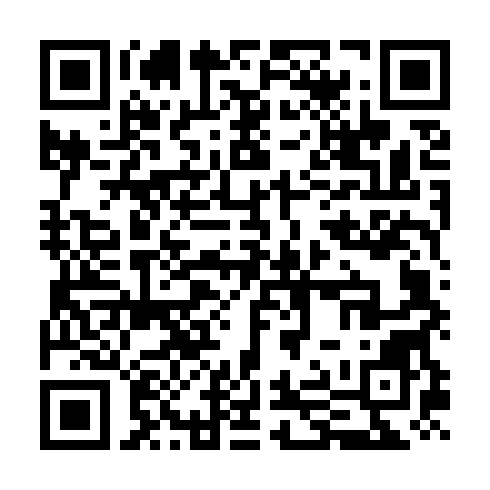

In [21]:
from Bio.Seq import Seq
import random
import hashlib
import qrcode
from PIL import Image
from IPython.display import display

# Generate a random DNA sequence
def get_dna_sequence(length=40):
    return ''.join(random.choices("ATCG", k=length))

# Map DNA bases to symbols for complexity
dna_ascii_map = {
    'A': '@', 'T': '#', 'C': '$', 'G': '%'
}

def dna_to_symbols(dna_seq):
    return ''.join(dna_ascii_map[nuc] for nuc in dna_seq)

# Generate password from DNA sequence
def dna_to_password(dna_seq):
    dna_symbols = dna_to_symbols(dna_seq)
    hashed = hashlib.sha256(dna_seq.encode()).hexdigest()
    raw_password = dna_symbols + hashed[:8]
    password_list = list(raw_password)
    random.shuffle(password_list)
    return ''.join(password_list)

# Generate and display QR code
def generate_qr_code(dna_seq, password, title="dna_password_qr.png"):
    qr_data = f"🧬 DNA: {dna_seq}\n🔐 Password: {password}"
    qr = qrcode.QRCode(version=1, box_size=10, border=4)
    qr.add_data(qr_data)
    qr.make(fit=True)

    img = qr.make_image(fill_color='black', back_color='white')
    img.save(title)
    display(img)

# --- Main Execution ---
dna_seq = get_dna_sequence()
password = dna_to_password(dna_seq)
generate_qr_code(dna_seq, password)
